# Предсказание эмоции

В данном ноутбуке показано как использовать модель для предсказания эмоции на изображении.


In [1]:
import os
# Для корректной работы под Windows, делаем корневую директорию jupyter notebook текущей.
if os.name == 'nt':
    %cd

C:\Users\user


In [2]:
# Устанавливаем модуль import_ipynb и импортируем его.
# Он необходим для импорта файлов .ipynb.
try:
    import import_ipynb
except:
    ! pip install import-ipynb
    import import_ipynb

# Клонируем проект. Далее из проекта нам понадобиться файл 
# импорта модели - import_model.ipynb, расположенный в корне проекта.
try:
    from skillbox_thesis_project.import_model import Model
except ModuleNotFoundError:
    ! git clone https://github.com/GrinkoL/skillbox_thesis_project.git
    from skillbox_thesis_project.import_model import Model

importing Jupyter notebook from C:\Users\user\skillbox_thesis_project\import_model.ipynb


In [7]:
# Загружаем модель. При выполнении следующий строчки кода происходит скачивание архива модели,
# распоковка его в директорию model, которая создаться в текущей директории,
# а также импорт модели в атрибут predictor созданного объекта класса Model, который 
# описан в файле import_model.ipynb.
model = Model()

In [6]:
import gdown
import zipfile

# Загружаем и распаковываем тестовый датасет, а также удаляем загруженный архив.
if not os.path.exists('test'):
    if not os.path.exists('test.zip'):
        gdown.download('https://drive.google.com/uc?id=1bGHeWeWYXj5biL9s-qTc9gyv91WNAbWE', 'test.zip', False)
    if os.name == 'nt': # Елси имеем дело с Windows
        with zipfile.ZipFile('test.zip') as zip:
            for zip_info in zip.infolist():
                if zip_info.filename[-1] == '/':
                    continue
                zip_info.filename = os.path.basename(zip_info.filename)
                zip.extract(zip_info,'test')
        os.remove('test.zip')
    elif os.name == 'posix': # Елси имеем дело с Linux
        ! unzip -j test.zip -d test > /dev/null
        ! rm test.zip
    else:
        raise Exception('Проект должен быть запущен либо на Linux либо на Windows (7 и старше) операционной системе')

In [21]:
# Выполним предсказание эмоции на одном из тестовых изображений
# и попутно замерим скорость инференса.
# ВНИМАНИЕ! Если вы запускаете инференс на Google Colab c GPU,
# то первый запуск инференса будет происходит долго,
# порядка нескольких секунд, поэтому замерять нужно со второго запуска.
if os.name == 'posix':
    %%time
img_path = 'test/70.jpg'
if os.name == 'nt':
    %time emotion = model.predict(img_path)
    
# Мой ноутбук c Windows 10 без GPU справился с инференсом за 205 мс.
# Запуск же на Google Colab с GPU происходит за 55 мс.

Wall time: 205 ms


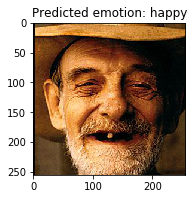

In [22]:
# Посмотрим на выбранное изображение и результат инференса.
import matplotlib.pyplot as plt
from PIL import Image

def visualize(img_path):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title(f'Predicted emotion: {emotion}')
  plt.imshow(Image.open(img_path))

visualize(img_path)